## Predicting Customer Churns

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [173]:
churn = pd.read_csv('online_retail.csv')
churn.head()

,Transaction_ID,Product_Code,Product_Title,Units_Sold,Transaction_Timestamp,Unit_Cost,Client_ID,Client_Region
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,01-12-2009 07:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,01-12-2009 07:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,01-12-2009 07:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,01-12-2009 07:45,1.25,13085.0,United Kingdom


In [174]:
# Dataframe Shape
churn.shape

(525461, 8)

In [175]:
# Finding the number of missing values in each column
churn.isna().sum()

Transaction_ID                0
Product_Code                  0
Product_Title              2928
Units_Sold                    0
Transaction_Timestamp         0
Unit_Cost                     0
Client_ID                107927
Client_Region                 0
dtype: int64

## Data Preprocessing

### Handling Dupliactes

In [176]:
# Dropping duplicate rows
churn.drop_duplicates(inplace = True)

In [177]:
churn.shape

(518596, 8)

In [178]:
# Standardizing product codes
churn['Product_Code'] = churn['Product_Code'].astype(str)
churn['Product_Code'] = churn['Product_Code'].str.strip()
churn['Product_Code'] = churn['Product_Code'].str.replace(r'\s+', '', regex=True)
churn['Product_Code'] = churn['Product_Code'].str.upper()

In [179]:
# converting all product titles to lowercase
churn['Product_Title_Cleaned'] = churn['Product_Title'].astype(str)
churn['Product_Title_Cleaned'] = churn['Product_Title_Cleaned'].str.strip()
churn['Product_Title_Cleaned'] = churn['Product_Title_Cleaned'].str.replace(r'\s+', ' ', regex=True)
churn['Product_Title_Cleaned'] = churn['Product_Title_Cleaned'].str.lower()

In [180]:
churn.drop(columns=['Product_Title'], inplace=True)

In [181]:
churn['Product_Code'].fillna('no code', inplace=True)

C:\Users\Jakkala\AppData\Local\Temp\ipykernel_14908\1582623180.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn['Product_Code'].fillna('no code', inplace=True)


In [182]:
# All the product codes are standardized

### Handling Missing Values

In [183]:
churn['Client_ID'].fillna('Guest', inplace=True)

C:\Users\Jakkala\AppData\Local\Temp\ipykernel_14908\546381977.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  churn['Client_ID'].fillna('Guest', inplace=True)
C:\Users\Jakkala\AppData\Local\Temp\ipykernel_14908\546381977.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Guest' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  churn['Client_ID'].fillna('Guest', inplace=True)


In [184]:
churn.isna().sum()

Transaction_ID           0
Product_Code             0
Units_Sold               0
Transaction_Timestamp    0
Unit_Cost                0
Client_ID                0
Client_Region            0
Product_Title_Cleaned    0
dtype: int64

### Handling DataTypes

In [185]:
churn.dtypes

Transaction_ID            object
Product_Code              object
Units_Sold                 int64
Transaction_Timestamp     object
Unit_Cost                float64
Client_ID                 object
Client_Region             object
Product_Title_Cleaned     object
dtype: object

In [186]:
churn['Transaction_Timestamp'] = pd.to_datetime(churn['Transaction_Timestamp'], format = '%d-%m-%Y %H:%M', dayfirst = True)

## EDA

In [187]:
churn.nunique()

Transaction_ID           28816
Product_Code              4480
Units_Sold                 825
Transaction_Timestamp    25296
Unit_Cost                 1606
Client_ID                 4384
Client_Region               40
Product_Title_Cleaned     4630
dtype: int64

In [188]:
churn['Unit_Cost'].describe()

count    518596.000000
mean          4.716176
std         147.090460
min      -53594.360000
25%           1.250000
50%           2.100000
75%           4.210000
max       25111.090000
Name: Unit_Cost, dtype: float64

In [189]:
# negative values in Unit Cost must be outliers
churn[churn['Unit_Cost'] < 0]

,Transaction_ID,Product_Code,Units_Sold,Transaction_Timestamp,Unit_Cost,Client_ID,Client_Region,Product_Title_Cleaned
179403,A506401,B,1,2010-04-29 13:36:00,-53594.36,Guest,United Kingdom,adjust bad debt
276274,A516228,B,1,2010-07-19 11:24:00,-44031.79,Guest,United Kingdom,adjust bad debt
403472,A528059,B,1,2010-10-20 12:04:00,-38925.87,Guest,United Kingdom,adjust bad debt


In [190]:
# these are not product purchases at all
# we can drop them
churn.drop(churn[churn['Unit_Cost'] < 0].index, inplace=True)

In [191]:
churn['Unit_Cost'].describe()

count    518593.000000
mean          4.979516
std          97.128954
min           0.000000
25%           1.250000
50%           2.100000
75%           4.210000
max       25111.090000
Name: Unit_Cost, dtype: float64

In [192]:
churn[churn['Unit_Cost'] > 10000]

,Transaction_ID,Product_Code,Units_Sold,Transaction_Timestamp,Unit_Cost,Client_ID,Client_Region,Product_Title_Cleaned
135012,C502262,M,-1,2010-03-23 15:20:00,10953.50,12918.0,United Kingdom,manual
135013,502263,M,1,2010-03-23 15:22:00,10953.50,12918.0,United Kingdom,manual
135014,C502264,M,-1,2010-03-23 15:24:00,10953.50,12918.0,United Kingdom,manual
135015,502265,M,1,2010-03-23 15:28:00,10953.50,Guest,United Kingdom,manual
241824,C512770,M,-1,2010-06-17 16:52:00,25111.09,17399.0,United Kingdom,manual
241827,512771,M,1,2010-06-17 16:53:00,25111.09,Guest,United Kingdom,manual
320581,C520667,BANKCHARGES,-1,2010-08-27 13:42:00,18910.69,Guest,United Kingdom,bank charges
342135,C522793,M,-1,2010-09-16 14:53:00,10468.80,14063.0,United Kingdom,manual
342147,522796,M,1,2010-09-16 15:12:00,10468.80,Guest,United Kingdom,manual
358639,524159,M,1,2010-09-27 16:12:00,10468.80,14063.0,United Kingdom,manual


In [193]:
# most of the purchases with cost > 10000 are not product purchases
# they are manual entries
# they have units = (negative)
# they have product code = M
# there are products with some more junk titles

In [194]:
churn.drop(churn[churn['Unit_Cost'] > 10000].index, inplace=True)

In [195]:
single_codes = churn[churn['Product_Code'].str.len() == 1]
single_codes['Product_Code'].value_counts()

Product_Code
M    836
D    100
S     41
Name: count, dtype: int64

In [196]:
# checking the records whose product code has 1 letter only
single_codes[['Product_Code', 'Product_Title_Cleaned', 'Unit_Cost', 'Units_Sold']]

,Product_Code,Product_Title_Cleaned,Unit_Cost,Units_Sold
735,D,discount,9.00,-1
736,D,discount,19.00,-1
2697,M,manual,4.00,1
3053,M,manual,5.10,-1
5897,M,manual,69.57,-1
...,...,...,...,...
521122,M,manual,2.95,12
521124,M,manual,0.19,12
522330,D,discount,267.12,-1
524696,M,manual,0.50,-4


In [197]:
churn.drop(single_codes.index, inplace=True)

In [198]:
# replacing codes with any other possible junk product codes

In [199]:
junk_codes = ['', 'NAN', 'NA', '?', 'NONE', 'NULL']
churn['Product_Code'] = churn['Product_Code'].replace(junk_codes, 'JUNK')

In [200]:
junk_code_count = (churn['Product_Code'] == 'JUNK').sum()
no_code_count = (churn['Product_Code'] == 'no code').sum()
other_code_count = ((churn['Product_Code'] != 'JUNK') & (churn['Product_Code'] != 'no code')).sum()
print(junk_code_count, no_code_count, other_code_count)

0 0 517599


In [201]:
labels=['Junk Codes', 'No Code', 'Other Codes']
sizes=[junk_code_count, no_code_count, other_code_count]

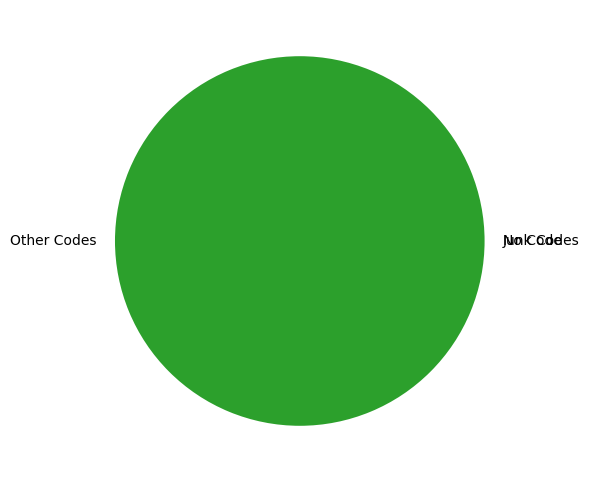

In [202]:
plt.figure(figsize=(10, 6))
plt.pie(sizes, labels=labels)
plt.show()

In [203]:
# now we will check the columns which have negative units
negative_unit_cost = churn[churn['Units_Sold'] < 0]
negative_unit_cost[['Product_Code', 'Product_Title_Cleaned', 'Unit_Cost', 'Units_Sold']]

,Product_Code,Product_Title_Cleaned,Unit_Cost,Units_Sold
178,22087,paper bunting white lace,2.95,-12
179,85206A,cream felt easter egg basket,1.65,-6
180,21895,potting shed sow 'n' grow set,4.25,-4
181,21896,potting shed twine,2.10,-6
182,22083,paper chain kit retro spot,2.95,-12
...,...,...,...,...
525231,21324,nan,0.00,-18
525232,20892,nan,0.00,-32
525234,46000S,dotcom sales,0.00,-100
525235,46000M,dotcom sales,0.00,-100


In [204]:
#since we have many such records, we will label them as returns
churn['Neg_Units'] = churn['Units_Sold'] < 0
# neg units can imply returns
# hence the customers can be more likely to churn

In [205]:
churn.drop(churn[churn['Units_Sold'] < 0].index, inplace =True)

In [206]:
churn['Unit_Cost'].describe()

count    505728.000000
mean          3.723055
std          15.908403
min           0.000000
25%           1.250000
50%           2.100000
75%           4.210000
max        6706.710000
Name: Unit_Cost, dtype: float64

In [207]:
churn[churn['Unit_Cost'] > 300]

,Transaction_ID,Product_Code,Units_Sold,Transaction_Timestamp,Unit_Cost,Client_ID,Client_Region,Product_Title_Cleaned,Neg_Units
2379,489597,DOT,1,2009-12-01 14:28:00,647.19,Guest,United Kingdom,dotcom postage,False
5063,489856,DOT,1,2009-12-02 14:36:00,470.24,Guest,United Kingdom,dotcom postage,False
5407,489857,DOT,1,2009-12-02 14:43:00,775.24,Guest,United Kingdom,dotcom postage,False
8374,490074,DOT,1,2009-12-03 14:39:00,862.67,Guest,United Kingdom,dotcom postage,False
9701,490149,DOT,1,2009-12-04 09:43:00,922.05,Guest,United Kingdom,dotcom postage,False
...,...,...,...,...,...,...,...,...,...
521479,537823,DOT,1,2010-12-08 14:25:00,729.42,Guest,United Kingdom,dotcom postage,False
524272,538071,DOT,1,2010-12-09 14:09:00,885.94,Guest,United Kingdom,dotcom postage,False
524887,538148,DOT,1,2010-12-09 16:26:00,547.32,Guest,United Kingdom,dotcom postage,False
525000,538149,DOT,1,2010-12-09 16:27:00,620.68,Guest,United Kingdom,dotcom postage,False


In [208]:
churn[churn['Product_Code'] == '84016']['Product_Title_Cleaned'].value_counts()

Product_Title_Cleaned
flag of st george car flag    66
Name: count, dtype: int64

In [209]:
churn[churn['Product_Code'] == '84016']['Unit_Cost'].value_counts()

Unit_Cost
0.42       46
0.00        6
25.53       3
93.61       2
0.83        1
25.52       1
280.75      1
867.79      1
0.35        1
408.40      1
1157.15     1
0.81        1
272.27      1
Name: count, dtype: int64

In [210]:
# same product is being sold for different, highly varying prices
# we need to remove them
churn.drop(churn[churn['Product_Code'] == '84016'].index, inplace = True)

In [211]:
# we should also drop items with code DOT 
churn.drop(churn[churn['Product_Code'].isin(['DOT', 'AMAZONFEE', 'POST', 'ADJUST', 'ADJUST2'])].index, inplace = True)

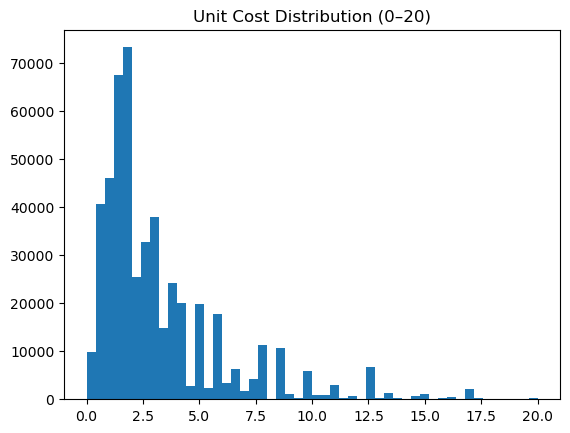

In [212]:
plt.hist(churn[churn['Unit_Cost'].between(0, 20)]['Unit_Cost'], bins=50)
plt.title("Unit Cost Distribution (0–20)")
plt.show()

In [213]:
# the distribution is right skewed

In [214]:
churn['Units_Sold'].describe()

count    504126.000000
mean         11.833300
std          92.456695
min           1.000000
25%           1.000000
50%           3.000000
75%          12.000000
max       19152.000000
Name: Units_Sold, dtype: float64

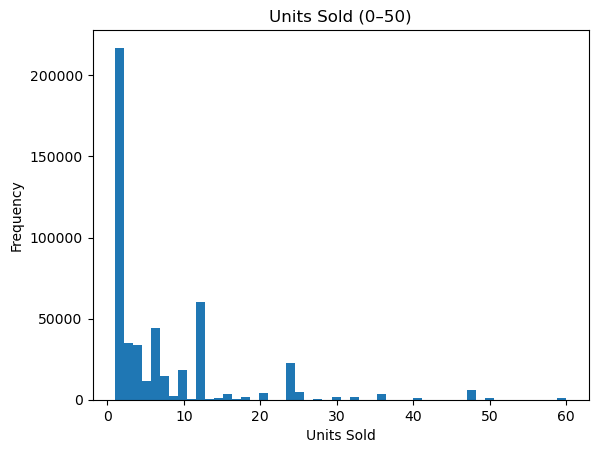

In [215]:
plt.hist(churn[churn['Units_Sold'] <= 60]['Units_Sold'], bins=50)
plt.title("Units Sold (0–50)")
plt.xlabel("Units Sold")
plt.ylabel("Frequency")
plt.show()

In [216]:
churn[churn['Units_Sold'] > 10000]

,Transaction_ID,Product_Code,Units_Sold,Transaction_Timestamp,Unit_Cost,Client_ID,Client_Region,Product_Title_Cleaned,Neg_Units
90857,497946,37410,19152,2010-02-15 11:57:00,0.1,13902.0,Denmark,black and white paisley flower mug,False
127166,501534,21099,12960,2010-03-17 13:09:00,0.1,13902.0,Denmark,set/6 strawberry paper cups,False
127167,501534,21092,12480,2010-03-17 13:09:00,0.1,13902.0,Denmark,set/6 strawberry paper plates,False
127168,501534,21091,12960,2010-03-17 13:09:00,0.1,13902.0,Denmark,set/6 woodland paper plates,False
127169,501534,21085,12744,2010-03-17 13:09:00,0.1,13902.0,Denmark,set/6 woodland paper cups,False


In [217]:
# all the purchases above 10000 units are meaningful
# product with product code 84016 has 0.0 unit cost

In [218]:
churn[churn['Unit_Cost'] == 0.0].describe()

,Units_Sold,Transaction_Timestamp,Unit_Cost
count,1546.000000,1546,1546.0
mean,103.201811,2010-06-15 01:51:27.671409920,0.0
min,1.000000,2009-12-01 17:39:00,0.0
25%,1.000000,2010-03-05 13:12:45,0.0
50%,4.000000,2010-06-17 14:10:30,0.0
75%,25.000000,2010-09-29 16:22:00,0.0
max,9600.000000,2010-12-09 17:18:00,0.0
std,537.777572,NaN,0.0


In [219]:
# we are dropping these rows because most of them have nan as titles
# they might be free samples given
churn.drop(churn[churn['Unit_Cost'] == 0.0].index, inplace=True)

In [220]:
# lets not drop these rows
# we will create a new feature for flagging instead

## Feature Engineering

In [221]:
# to train the model, we need to create useful features
# from the features that already exist

In [222]:
# since we need different features to analayze different kinds of customer behaviour
# we will create features seperately for each model

## Saving the Current Data

In [223]:
# we will save the currently cleaned data in a file

In [224]:
churn.to_csv('cleaned_churn_data.csv', index=False)